# Import Data

For this purpose, this strategy will attemp to trade 3 instruments

1. AUDUSD H4 - Liquid, Low Volatility
1. AUDUSD D1 - Liquid, Low Volatility
1. EURUSD H4 - Liquid, Mid Volatility
1. EURUSD D1 - Liquid, Mid Volatility
1. GBPUSD H4 - Liquid, Extreme Volatility
1. GBPUSD D1 - Liquid, High Volatility
1. Wirdcard D1 - Illiquid, High Volatility

## AUDUSD D1


In [1]:

import pandas as pd
import import_ipynb
from strategy_sv import TradeStrategySV

forex_symbol = "AUDUSD"

forex_df = pd.read_csv('../../data/gen/{}_Daily_df.csv'.format(forex_symbol),
                       parse_dates=True,
                       index_col=0)
# Strip whitespace from column names
forex_df.columns = forex_df.columns.str.strip()

# Trading Parameters
lots = 1 
leverage = 400 # 400 Leverage
margin = 0.1 # 10% Margin Interest
pip_cost = 0.8 # Transaction Cost 0.8 pip
stop_loss = 2.0 # Stop Loss at 2.0 of standard deviation (so 5%)
one_trade_week = 5
one_trade_month = one_trade_week * 4
two_trade_month = one_trade_month * 2
three_trade_month = one_trade_month * 3
half_trade_year = three_trade_month * 2
one_trade_year = half_trade_year * 2

buy_slope_threshold = 0.00011578947368419412 
buy_velocity_threshold = -0.01695000000000002
close_slope_threshold = 0.017273684210526295
close_velocity_threshold = 0.018381578947368395
sell_slope_threshold = -0.00011578947368419412
sell_velocity_threshold = 0.01695000000000002 

# Initialize Strategy
strategy = TradeStrategySV(leverage=leverage,
                           margin=margin,
                           pip_cost=pip_cost,
                           buy_slope_threshold=buy_slope_threshold, 
                           buy_velocity_threshold=buy_velocity_threshold, 
                           close_slope_threshold=close_slope_threshold, 
                           close_velocity_threshold=close_velocity_threshold, 
                           sell_slope_threshold=sell_slope_threshold, 
                           sell_velocity_threshold=sell_velocity_threshold, 
                           should_log = True)
# backtest_df = forex_df[:one_trade_year]
forex_df = strategy.trade(data_df=forex_df, 
                          symbol=forex_symbol,
                          lots=lots,
                          stop_loss=stop_loss,)
test_df = forex_df[-one_trade_year:]
test_df = strategy.trade(data_df=test_df, 
                         symbol=forex_symbol,
                         lots=lots,
                         stop_loss=stop_loss,)

print("In the latest {} trading days, StrategySV resulted ${}, or {}%".format(len(test_df.index), round(strategy.trade_profit, 2), round(strategy.trade_profit/(lots * 100000 / leverage), 2)))

# Print
test_df.head()


importing Jupyter notebook from strategy_sv.ipynb
In the latest 240 trading days, StrategySV resulted $57732.7, or 230.93%


,timestamp,open,high,low,close,pre_close,p_change,pip_change,profit,slope,velocity,position
239,2018-09-13,0.7170,0.7229,0.7165,0.7191,0.7170,0.002929,29.288703,276.887029,0.00210,-0.003100,LONG
238,2018-09-14,0.7191,0.7216,0.7148,0.7150,0.7191,-0.005702,-57.015714,554.157141,-0.00100,-0.002075,SHORT
237,2018-09-16,0.7149,0.7159,0.7147,0.7150,0.7150,0.000000,0.000000,-16.000000,-0.00205,0.000575,SHORT
236,2018-09-17,0.7150,0.7197,0.7139,0.7153,0.7150,0.000420,4.195804,25.958042,0.00015,0.002975,LONG
235,2018-09-18,0.7153,0.7235,0.7141,0.7228,0.7153,0.010485,104.851111,1032.511114,0.00390,0.002550,LONG


# Initialize Strategy 

Let's create a strategy which with the following:

`buy_slope_threshold` = 0.1 # The slope required to trigger BUY
`buy_velocity_threshold` = 0.1 # The velocity required to trigger BUY
`close_slope_threshold` = 0 # The slope required to trigger CLOSE
`close_velocity_threshold` = 0 # The slope required to trigger CLOSE
`sell_slope_threshold` = -0.1 # The slope required to trigger SELL
`sell_velocity_threshold` = -0.1 # The velocity required to trigger SELL


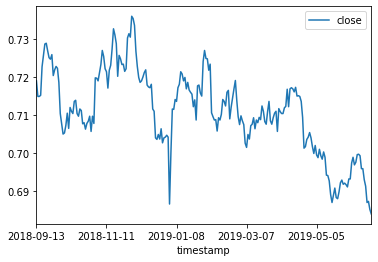

In [2]:

test_df.plot(x="timestamp", 
             y="close")



#### Plot Trade with Candlesticks Chart


Plotting 240 results for trade days
SHORT 2018-09-13 - 2018-09-14, Profit: $554.16 (57.0 pips)
HOLD 2018-09-16
LONG 2018-09-14 - 2018-09-17, Profit: $25.96 (4.2 pips)
HOLD 2018-09-18
HOLD 2018-09-19
HOLD 2018-09-20
HOLD 2018-09-21
SHORT 2018-09-17 - 2018-09-23, Profit: $258.35 (27.4 pips)
HOLD 2018-09-24
HOLD 2018-09-25
LONG 2018-09-23 - 2018-09-26, Profit: $149.56 (16.6 pips)
SHORT 2018-09-26 - 2018-09-27, Profit: $741.58 (75.8 pips)
HOLD 2018-09-28
LONG 2018-09-27 - 2018-09-30, Profit: $108.65 (12.5 pips)
HOLD 2018-10-01
SHORT 2018-09-30 - 2018-10-02, Profit: $496.18 (51.2 pips)
HOLD 2018-10-03
HOLD 2018-10-04
HOLD 2018-10-05
HOLD 2018-10-07
LONG 2018-10-02 - 2018-10-08, Profit: $267.53 (28.4 pips)
HOLD 2018-10-09
SHORT 2018-10-08 - 2018-10-10, Profit: $546.9 (56.3 pips)
LONG 2018-10-10 - 2018-10-11, Profit: $762.38 (77.8 pips)
HOLD 2018-10-12
SHORT 2018-10-11 - 2018-10-14, Profit: $68.38 (8.4 pips)
LONG 2018-10-14 - 2018-10-15, Profit: $434.39 (45.0 pips)
HOLD 2018-10-16
SHORT 2018-

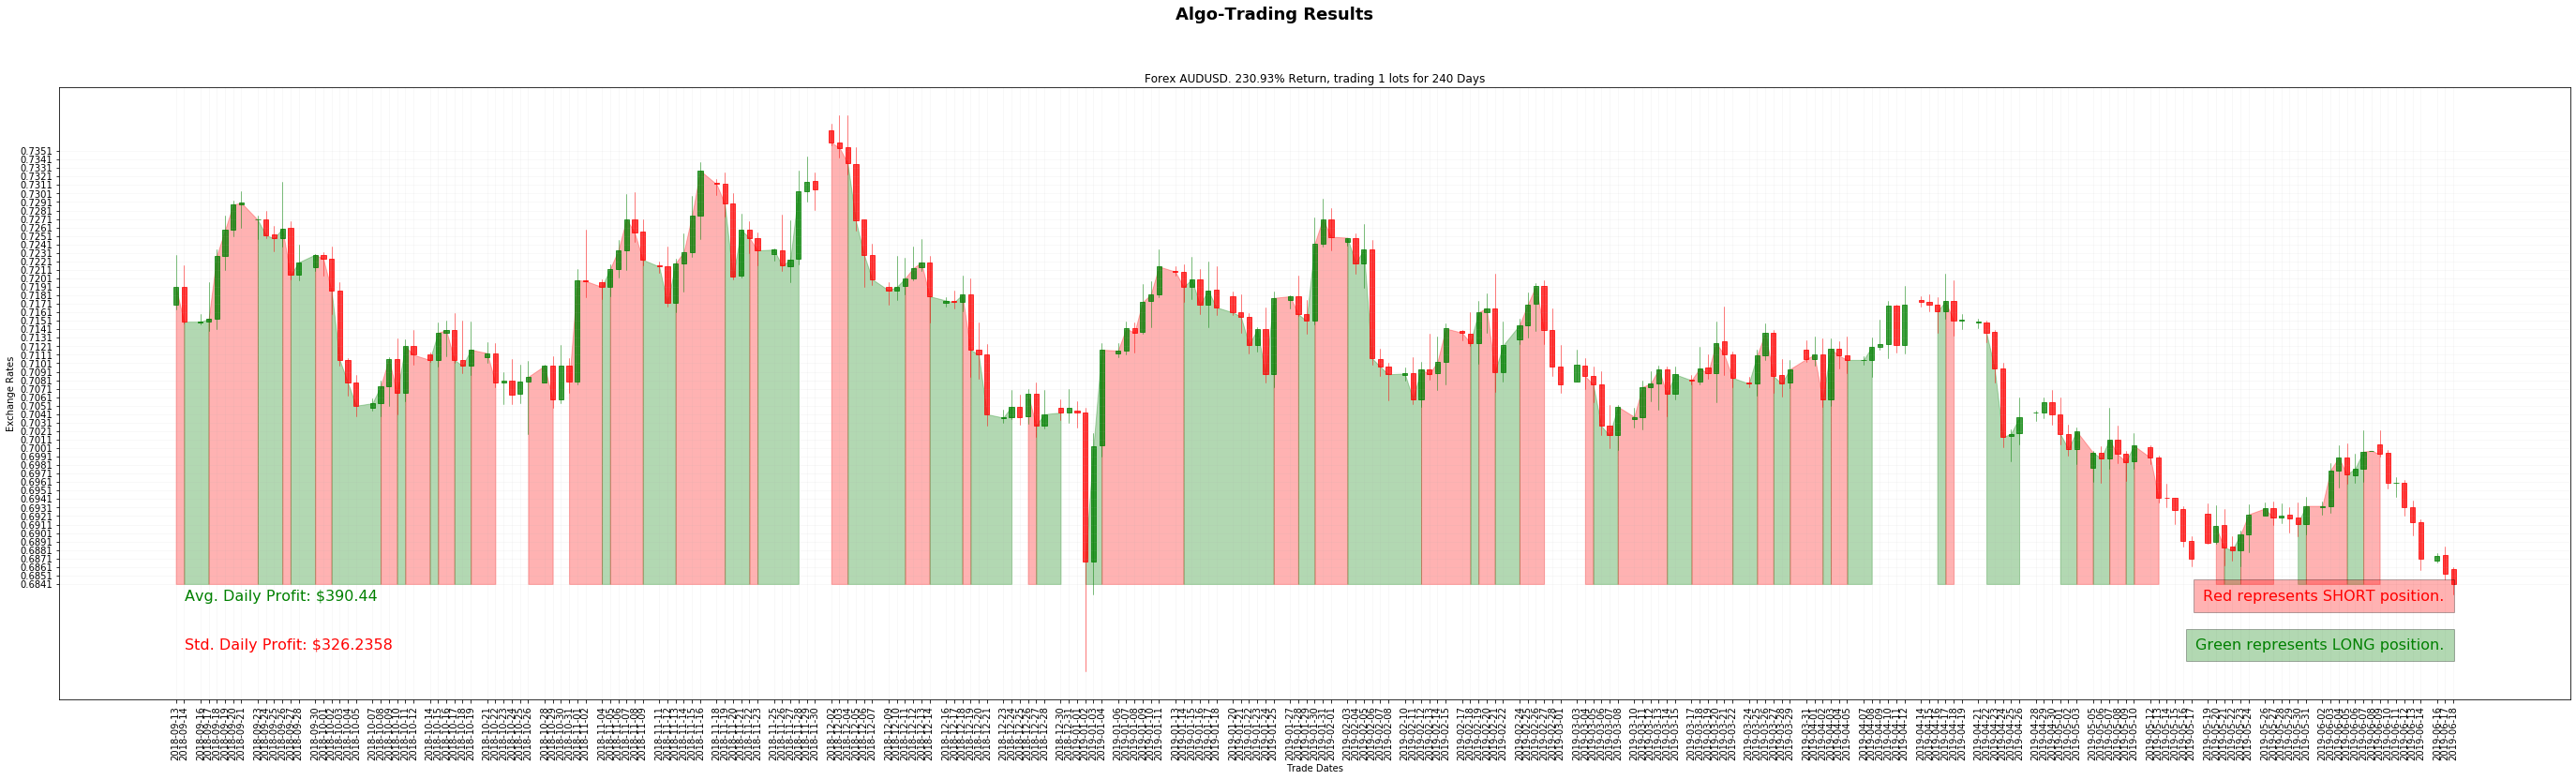

In [3]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize = (int(len(test_df.index)/5),12))

fig.suptitle('Algo-Trading Results', fontsize=18, fontweight='bold')
strategy.plot_trade(axs=axs)

fig.savefig('../gen/StrategySV_{}_Daily.png'.format(forex_symbol), dpi=150, bbox_inches="tight")


## EURUSD D1


In [4]:

import pandas as pd
import import_ipynb
from strategy_sv import TradeStrategySV

forex_symbol = "EURUSD"

forex_df = pd.read_csv('../../data/gen/{}_Daily_df.csv'.format(forex_symbol),
                       parse_dates=True,
                       index_col=0)
# Strip whitespace from column names
forex_df.columns = forex_df.columns.str.strip()

# Trading Parameters
lots = 1 
leverage = 400 # 400 Leverage
margin = 0.1 # 10% Margin Interest
pip_cost = 0.8 # Transaction Cost 0.8 pip
stop_loss = 2.0 # Stop Loss at 2.0 of standard deviation (so 5%)
one_trade_week = 5
one_trade_month = one_trade_week * 4
two_trade_month = one_trade_month * 2
three_trade_month = one_trade_month * 3
half_trade_year = three_trade_month * 2
one_trade_year = half_trade_year * 2

buy_slope_threshold = 0.00011578947368419412 
buy_velocity_threshold = -0.01695000000000002
close_slope_threshold = 0.017273684210526295
close_velocity_threshold = 0.018381578947368395
sell_slope_threshold = -0.00011578947368419412
sell_velocity_threshold = 0.01695000000000002 

# Initialize Strategy
strategy = TradeStrategySV(leverage=leverage,
                           margin=margin,
                           pip_cost=pip_cost,
                           buy_slope_threshold=buy_slope_threshold, 
                           buy_velocity_threshold=buy_velocity_threshold, 
                           close_slope_threshold=close_slope_threshold, 
                           close_velocity_threshold=close_velocity_threshold, 
                           sell_slope_threshold=sell_slope_threshold, 
                           sell_velocity_threshold=sell_velocity_threshold, 
                           should_log = True)
# backtest_df = forex_df[:one_trade_year]
forex_df = strategy.trade(data_df=forex_df, 
                          symbol=forex_symbol,
                          lots=lots,
                          stop_loss=stop_loss,)
test_df = forex_df[-one_trade_year:]
test_df = strategy.trade(data_df=test_df, 
                         symbol=forex_symbol,
                         lots=lots,
                         stop_loss=stop_loss,)

print("In the latest {} trading days, StrategySV resulted ${}, or {}%".format(len(test_df.index), round(strategy.trade_profit, 2), round(strategy.trade_profit/(lots * 100000 / leverage), 2)))

# Print
test_df.head()


In the latest 240 trading days, StrategySV resulted $37893.89, or 151.58%


,timestamp,open,high,low,close,pre_close,p_change,pip_change,profit,slope,velocity,position
,,,,,,,,,,,,
239,2018-09-13,1.1628,1.1701,1.1607,1.1690,1.1627,0.005418,54.184226,525.842264,0.00630,-0.006400,LONG
238,2018-09-14,1.1690,1.1722,1.1619,1.1625,1.1690,-0.005560,-55.603080,0.000000,-0.00010,-0.004775,CLOSE
237,2018-09-16,1.1620,1.1632,1.1616,1.1625,1.1625,0.000000,0.000000,-16.000000,-0.00325,0.001175,SHORT
236,2018-09-17,1.1625,1.1698,1.1617,1.1670,1.1625,0.003871,38.709677,371.096774,0.00225,0.002975,LONG
235,2018-09-18,1.1671,1.1724,1.1651,1.1679,1.1670,0.000771,7.712082,61.120823,0.00270,-0.001100,LONG


# Initialize Strategy 

Let's create a strategy which with the following:

`buy_slope_threshold` = 0.1 # The slope required to trigger BUY
`buy_velocity_threshold` = 0.1 # The velocity required to trigger BUY
`close_slope_threshold` = 0 # The slope required to trigger CLOSE
`close_velocity_threshold` = 0 # The slope required to trigger CLOSE
`sell_slope_threshold` = -0.1 # The slope required to trigger SELL
`sell_velocity_threshold` = -0.1 # The velocity required to trigger SELL


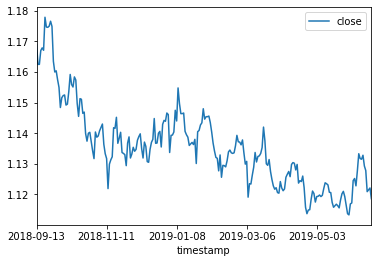

In [5]:

test_df.plot(x="timestamp", 
             y="close")



#### Plot Trade with Candlesticks Chart


Plotting 240 results for trade days
CLOSE 2018-09-16
LONG 2018-09-16 - 2018-09-17, Profit: $371.1 (38.7 pips)
HOLD 2018-09-18
CLOSE 2018-09-20
HOLD 2018-09-21
SHORT 2018-09-20 - 2018-09-23, Profit: $-7.49 (0.9 pips)
LONG 2018-09-23 - 2018-09-24, Profit: $18.05 (3.4 pips)
HOLD 2018-09-25
CLOSE 2018-09-27
HOLD 2018-09-28
HOLD 2018-09-30
HOLD 2018-10-01
HOLD 2018-10-02
HOLD 2018-10-03
HOLD 2018-10-04
LONG 2018-09-27 - 2018-10-05, Profit: $44.78 (6.1 pips)
HOLD 2018-10-07
SHORT 2018-10-05 - 2018-10-08, Profit: $270.33 (28.6 pips)
HOLD 2018-10-09
LONG 2018-10-08 - 2018-10-10, Profit: $340.68 (35.7 pips)
HOLD 2018-10-11
HOLD 2018-10-12
SHORT 2018-10-10 - 2018-10-14, Profit: $53.21 (6.9 pips)
LONG 2018-10-14 - 2018-10-15, Profit: $269.69 (28.6 pips)
HOLD 2018-10-16
SHORT 2018-10-15 - 2018-10-17, Profit: $649.28 (66.5 pips)
HOLD 2018-10-18
LONG 2018-10-17 - 2018-10-19, Profit: $490.33 (50.6 pips)
HOLD 2018-10-21
SHORT 2018-10-19 - 2018-10-22, Profit: $383.62 (40.0 pips)
HOLD 2018-10-23
HOLD 20

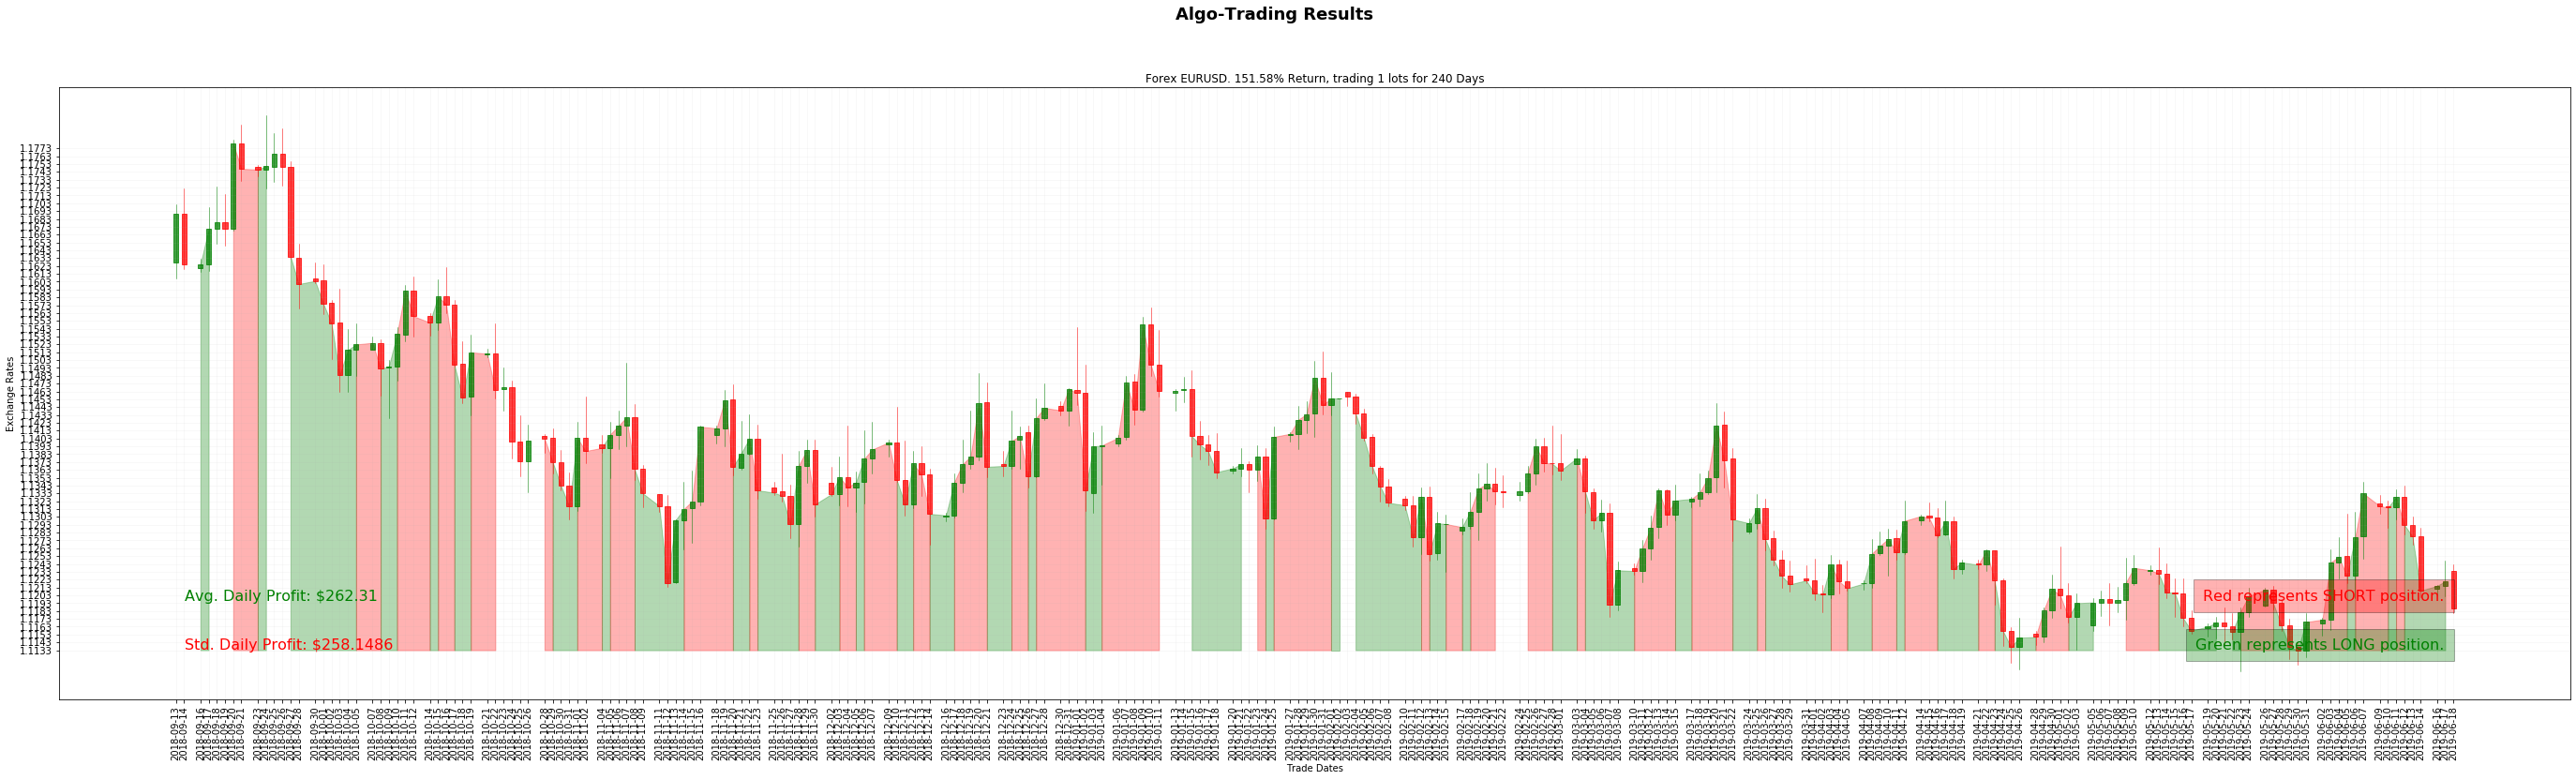

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize = (int(len(test_df.index)/5),12))

fig.suptitle('Algo-Trading Results', fontsize=18, fontweight='bold')
strategy.plot_trade(axs=axs)

fig.savefig('../gen/StrategySV_{}_Daily.png'.format(forex_symbol), dpi=150, bbox_inches="tight")